# 第28讲：搜索函数极小值

## scipy.optimize——函数最小化(标量或多维度)、曲线拟合、求根可能用到的函数


- brute          暴力搜索极小值
- curve_fit        曲线拟合
- fmin           找极小值
- fmin_bfgs        BFGS法找极小值
- fmin_cg  
- fmin_cobyla
- fmin_l_bfgs_b
- fmin_ncg       牛顿共轭梯度法
- fmin_powell     打靶法
- fmin_slsqp
- fmin_tnc
- leastsq       最小平方误差方法
- fminbound      约束极小
- fsolve        解方程
- minimize       极小化
- newton        牛顿法求根
- optimize      优化

## 关于求极小值的梯度下降法知识:
   
一般来说，倾向于

BFGS (scipy.optimize.fmin_bfgs())或 L-BFGS ((scipy.optimize.fmin_l_bfgs_b()))

 即使有大概的数值梯度，在状况良好的问题上，
 
 Powell (scipy.optimize.fmin_powell()) 以及 
 Nelder-Mead (scipy.optimize.fmin()), 
 
 都是在高维上效果良好的梯度自有方法，但是他们无法支持状况糟糕的问题。
  
  
BFGS的计算开支要大于L-BFGS, 它自身也比CG（共轭梯度法带字符 cg）法开销大。
另一方面，BFGS通常比CG需要更少函数评估。
因此，共轭梯度法对优化计算量较少的函数比BFGS更好。
  
带有Hessian: 如果你可以计算Hessian, 推荐牛顿法 (scipy.optimize.fmin_ncg())。
   
如果有噪音测量: 使用Nelder-Mead (scipy.optimize.fmin()) 或者 Powell (scipy.optimize.fmin_powell())。

## 寻找函数极小值的方法步骤

1. 定义目标函数f(x),一阶导函数fp(x)及二阶导函数fpp(x)
2. 导入求函数极小值的函数fmin,fmin_bfgs,fmin_ncg,fmin_l_bfgs _b,brute,minimize
3. 估计极小值位置的初值x0
4. 调用极小值函数fmin_bfgs(f,x0)等，求出函数极小值对应位置xmin
4. 依据位置xmin计算函数的极小值ymin=f(xmin)
5. 选择自变量区间，画出函数曲线和极小值位置点（xmin,ymin）


## 问题：寻找如下标量函数f(x)的最小值。

例如定义f(x)函数：
```
import numpy as np
def f(x): return x**2 + 10*np.sin(x)
```
这个函数在  -1.3 附近有一个全局最小，并且在  3.8 附近有一个局部最小。找到这个函数最小值位置最有效的算法是梯度下降算法BFGS ，其他算法可能花费更多时间。需要的程序fmin_1.py，内容如下：


Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5
xmin= [[-1.30644012  3.83746748]]
ymin= [[-7.94582338  8.31558558]]


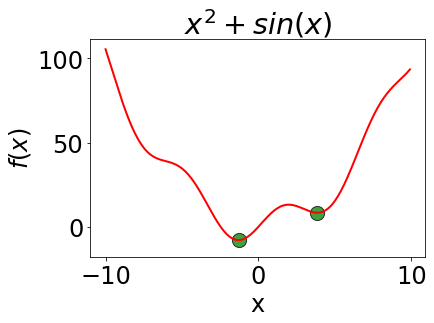

In [9]:
import numpy as np

def f(x):
    return x**2 + 10*np.sin(x)

from matplotlib import pyplot as plt
from scipy import optimize as opt

ofb=opt.fmin_bfgs

x0=0;
x1=4
xmin0=ofb(f, x0,disp=True)

xmin1=ofb(f,x1,disp=True)

xmin=np.array([xmin0,xmin1]).T

ymin=f(xmin)

print('xmin=',xmin)
print('ymin=',ymin)

x = np.arange(-10, 10, 0.1);

y=f(x)

v=dict(color='g',marker='o',alpha=0.75,edgecolor='k')

plt.rcParams['font.size']=24
plt.plot(x,y,'r',lw=2);
plt.scatter(xmin,ymin,200,**v)
plt.ylabel(r'$f(x)$');
plt.xlabel('x')
plt.title(r'$x^{2}+sin(x)$')
plt.show()

## 也可以调用fmin，求函数f(x)的极小值位置(xim,ymin)

In [11]:

opt.fmin(f,x0,disp=True)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 26
         Function evaluations: 52


array([-1.3064375])

In [5]:

opt.fmin(f,x1,disp=True)

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 13
         Function evaluations: 26


array([3.8375])

## 调用minimize也可以求出函数f(x)d的极小值位置(xmin,ymin)


调用：

scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

参数：

fun ：优化的目标函数

x0 ：初值，一维数组，shape (n,)

args ： 元组，可选，额外传递给优化函数的参数

method：求解的算法，选择TNC则和fmin_tnc()类似

jac：返回梯度向量的函数

返回：

返回优化结果对象，x：优化问题的目标数组。success: True表示成功与否，不成功会给出失败信息。


In [22]:
from scipy import optimize as opt
import numpy as np
def f(x):
    return x**2 + 10*np.sin(x)

x0=0;
opt.minimize(f,x0)

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [21]:
from scipy import optimize as opt
import numpy as np
def f(x):
    return x**2 + 10*np.sin(x)

x1=4
opt.minimize(f,x1)

      fun: 8.315585579478032
 hess_inv: array([[0.118692]])
      jac: array([3.21865082e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([3.83746748])

## 暴力搜索算法opt.brute示例
前面的算法可能因为初值选择不当，例如x1=4，结果得到的最小( 优化)值是函数的局部极小值，而不是全局极小值。为此还可以采用暴力搜索算法寻找全局最小值。例如

In [8]:
import numpy as np
def f(x):return x**2+10*np.sin(x)
from scipy import optimize as opt
grid=(-10,10,0.05)#切片
xmin_global=opt.brute(f,(grid,),disp=True)
ymin=f(xmin_global)
print('xmin=',xmin_global,',ymin=',ymin)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 11
         Function evaluations: 22
xmin= [-1.30641113] ,ymin= [-7.94582337]


## 如果限定搜索区间可以用opt.fminbound寻找函数局部最小值的位置及极小值。例如


In [13]:
import numpy as np
def f(x):return x**2+10*np.sin(x)
from scipy import optimize as opt
xmin_local1=opt.fminbound(f,0,10)
ymin1=f(xmin_local1)
print('xmin1=',xmin_local1,',ymin1=',ymin1)
xmin_local2=opt.fminbound(f,-10,0)
ymin2=f(xmin_local2)
print('xmin2=',xmin_local2,',ymin2=',ymin2)



xmin1= 3.8374671194983834 ,ymin1= 8.31558557947746
xmin2= -1.3064405641563348 ,ymin2= -7.945823375613483


## 以x[0],x[1]代表两个自变量，寻找二元函数极小值举例



In [14]:
import numpy as np

def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - x[0]**2)**2 # rosenbrock函数

def fp(x): 
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))#f(x)的导函数

from scipy import optimize as opt

x0=[2,2]#猜测的极小值位置初值

xmin=opt.fmin_bfgs(f,x0,fprime=fp,disp=True)

# opt.fmin_l_bfgs_b(f, x0, fprime=fp)或opt.fmin(f,x0)或opt.brute(f, ((-2, 3), (-2, 3)))

# def hessian(x):return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))  是Jocobi矩阵

# 或opt.fmin_ncg(f, [2, 2], fprime=fp, fhess=hessian）牛顿法

zmin=f(xmin)
print('xmin=',xmin,',zmin=',zmin)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
xmin= [1.00000582 1.00001285] ,zmin= 1.8414093407262628e-11


## 调用牛顿共轭梯度下降法求二元函数极小值举例

In [23]:
import numpy as np

def f(x):
    return 0.5*(1 - x[0])**2 + (x[1] - x[0]**2)**2 # rosenbrock函数

def fp(x): 
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))#f(x)的导函数

def fpp(x):
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))#f(x)的二阶导函数jacobi矩阵

from scipy import optimize as opt

x0=[2,2]#猜测的极小值位置初值
xmin=opt.fmin_ncg(f,x0,fprime=fp,fhess=fpp)
zmin=f(xmin);print('xmin=',xmin,',zmin=',zmin)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 19
         Hessian evaluations: 9
xmin= [1. 1.] ,zmin= 2.31290196365791e-26
